# alpha vantage data exploration

In [1]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import datetime as dt
import pandas as pd
import numpy as np
import os

api_key = "3PAPH3QCQ08JPD9E"
print('imported modules.')

imported modules.


## read in nasdaq .csv

In [2]:
nasdaq = pd.read_csv('nasdaq_screener.csv')
nasdaq.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$133.28,1.31,0.993%,4.061008e+10,United States,1999.0,2121339,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$32.84,-0.55,-1.647%,6.118788e+09,NaN,2016.0,6018047,Basic Industries,Aluminum
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.87,-0.03,-0.303%,1.233873e+09,NaN,2021.0,251428,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$3.09,-0.28,-8.309%,9.687305e+07,China,NaN,1646131,Consumer Services,Other Consumer Services
4,AACQ,Artius Acquisition Inc. Class A Common Stock,$10.04,-0.12,-1.181%,9.092475e+08,United States,2020.0,1312002,Basic Industries,Major Chemicals


## get length of datasets in years

In [3]:
def get_years(symbol):
    
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
    last_date = np.min(data.index)
    first_date = np.max(data.index)
    length = first_date - last_date
    years = round(length.total_seconds() / (60*60*24*365), 2)
    return(years)

In [4]:
my_symbol = nasdaq.Symbol[2]

In [5]:
get_years(my_symbol)

ValueError: Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.

## get years of data for all symbols

In [ ]:
years = []

for s in tqdm(nasdaq.Symbol):
    
    try:
        y = get_years(s)
    
    except:
        y = 'NA'
    
    years.append(y)
    
nasdaq['Years'] = years

### export new data to .csv

In [ ]:
nasdaq.to_csv('nasdaq_screener_years.csv', index = False)

### plot years

In [ ]:
nasdaq.Years[y != 'NA' for y in nasdaq.Years]

TypeError: '<=' not supported between instances of 'float' and 'str'

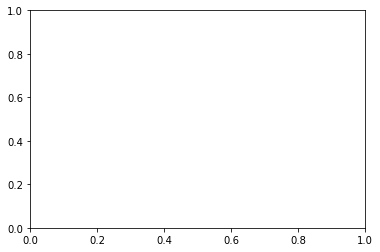

In [61]:
plt.hist(nasdaq[y !=.Years)

## pull time series based on nasdaq .csv

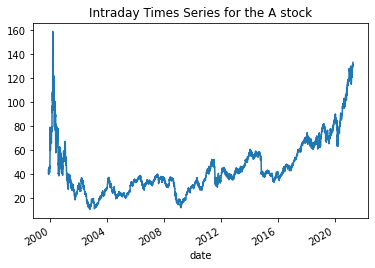

In [40]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol=my_symbol, outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the {} stock'.format(my_symbol))
plt.show()

In [31]:
data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-04-15,132.00,133.940,132.0000,133.28,133.280000,2115571.0,0.0,1.0
2021-04-14,133.10,133.225,130.9610,131.97,131.970000,1499287.0,0.0,1.0
2021-04-13,131.60,133.267,131.4700,132.97,132.970000,1593774.0,0.0,1.0
2021-04-12,131.44,132.180,130.8400,131.27,131.270000,1166306.0,0.0,1.0
2021-04-09,131.46,131.920,130.7343,131.91,131.910000,1552194.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-24,40.13,41.940,40.0000,41.06,27.161863,3464400.0,0.0,1.0
1999-11-23,42.50,43.630,40.2500,40.25,26.626035,4274400.0,0.0,1.0
1999-11-22,41.31,44.000,40.0600,44.00,29.106721,4705200.0,0.0,1.0


## download time series

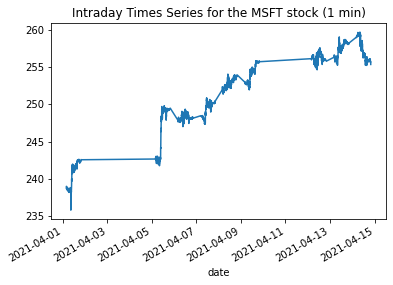

In [7]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

In [9]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2021-04-14 19:50:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [11]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-04-14 19:50:00,255.38,255.38,255.38,255.38,1075.0
2021-04-14 19:49:00,255.65,255.65,255.41,255.41,1520.0
2021-04-14 19:48:00,255.65,255.65,255.65,255.65,299.0
2021-04-14 19:38:00,255.80,255.80,255.80,255.80,100.0
2021-04-14 19:28:00,255.65,255.65,255.65,255.65,105.0
